In [4]:
!pip install opencv-python


In [5]:
import os
import pandas as pd
import cv2
import numpy as np
import shutil, os

In [3]:
#!unzip Data

Archive:  Data.zip
  inflating: Classes.xlsx            
  inflating: images/005.Crested_Auklet/Crested_Auklet_0001_794941.jpg  
  inflating: images/005.Crested_Auklet/Crested_Auklet_0003_794962.jpg  
  inflating: images/005.Crested_Auklet/Crested_Auklet_0005_794922.jpg  
  inflating: images/005.Crested_Auklet/Crested_Auklet_0006_1813.jpg  
  inflating: images/005.Crested_Auklet/Crested_Auklet_0010_794907.jpg  
  inflating: images/005.Crested_Auklet/Crested_Auklet_0011_794927.jpg  
  inflating: images/005.Crested_Auklet/Crested_Auklet_0012_794960.jpg  
  inflating: images/005.Crested_Auklet/Crested_Auklet_0013_794914.jpg  
  inflating: images/005.Crested_Auklet/Crested_Auklet_0018_1817.jpg  
  inflating: images/005.Crested_Auklet/Crested_Auklet_0019_794925.jpg  
  inflating: images/005.Crested_Auklet/Crested_Auklet_0021_794938.jpg  
  inflating: images/005.Crested_Auklet/Crested_Auklet_0028_794951.jpg  
  inflating: images/005.Crested_Auklet/Crested_Auklet_0029_1824.jpg  
  inflating: 

In [6]:

data_path = '../Data/images'
#data_path = './images'
class_folders = os.listdir(data_path)
print (class_folders)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(class_folders))

['005.Crested_Auklet', '013.Bobolink', '015.Lazuli_Bunting', '023.Brandt_Cormorant', '040.Olive_sided_Flycatcher', '041.Scissor_tailed_Flycatcher', '067.Anna_Hummingbird', '072.Pomarine_Jaeger', '076.Dark_eyed_Junco', '081.Pied_Kingfisher', '082.Ringed_Kingfisher', '086.Pacific_Loon', '099.Ovenbird', '104.American_Pipit', '127.Savannah_Sparrow', '135.Bank_Swallow', '141.Artic_Tern', '149.Brown_Thrasher', '156.White_eyed_Vireo', '168.Kentucky_Warbler']
Types of classes labels found:  20


In [6]:
class_labels = []
im_size = 224
images = []
labels = []
for class_folder in class_folders:
    class_images = os.listdir(data_path+'/'+class_folder)
    #print(images)
    for image in class_images:
        image_path = str(data_path+'/'+class_folder) + '/' + image
        class_labels.append((class_folder, image_path))
        img = cv2.imread(image_path)
        #print(image_path)
        #img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(class_folder)
        #print((class_name, str(data_path+'/'+class_name) + '/' + image))
#print(class_labels)

In [7]:
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
#print(df.tail())

                 Labels                                              image
0  023.Brandt_Cormorant  ./images/023.Brandt_Cormorant/Brandt_Cormorant...
1  023.Brandt_Cormorant  ./images/023.Brandt_Cormorant/Brandt_Cormorant...
2  023.Brandt_Cormorant  ./images/023.Brandt_Cormorant/Brandt_Cormorant...
3  023.Brandt_Cormorant  ./images/023.Brandt_Cormorant/Brandt_Cormorant...
4  023.Brandt_Cormorant  ./images/023.Brandt_Cormorant/Brandt_Cormorant...


In [8]:
images = np.array(images)

<ipython-input-8-2bbd740f17cb>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


In [9]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y, len(y))
print(set(y))

['023.Brandt_Cormorant' '023.Brandt_Cormorant' '023.Brandt_Cormorant' ...
 '072.Pomarine_Jaeger' '072.Pomarine_Jaeger' '072.Pomarine_Jaeger']
[3 3 3 ... 7 7 7] 1176
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}


In [10]:
y=y.reshape(-1,1)
print(y)
encoder = OneHotEncoder(handle_unknown='ignore', sparse = False)

encoded_y = encoder.fit_transform(y)

print(encoded_y[0:5])

[[3]
 [3]
 [3]
 ...
 [7]
 [7]
 [7]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import math

images, encoded_y = shuffle(images, encoded_y, random_state = 5)
X_train, X_test, y_train, y_test = train_test_split(images, encoded_y,
                                                    stratify=y, train_size=math.ceil(0.7*len(images))
                                                    )
X_cross_val, X_test, y_cross_val, y_test = train_test_split(X_test, y_test,
                                                    stratify=y_test, 
                                                    train_size=math.ceil(0.15*len(images))
                                                    )
#print(len(set(y_train)), len(set(y_test)), len(set(y_cross_val)))
print(X_train.shape)
print(X_test.shape)
print(X_cross_val.shape)

print(y_train.shape)
print(y_test.shape)
print(y_cross_val.shape)

(824,)
(175,)
(177,)
(824, 20)
(175, 20)
(177, 20)


In [12]:
n_classes = 20
image_size = 224
channels = 3

In [13]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
import numpy as np
import tensorflow as tf
from tensorflow.keras import activations

In [14]:
!pip install -U segmentation-models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 6.0 MB/s 


In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
import cv2
import albumentations as albu
from skimage.transform import resize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
import keras
from keras.models import Sequential, load_model
from keras.layers import Dropout, Dense, GlobalAveragePooling2D, MaxPooling2D
from keras.layers import BatchNormalization,Activation
from keras.optimizers import Adam
import efficientnet.keras as efn

In [16]:
batch_size = 5

In [17]:
def resize_img(img, shape):
    return cv2.resize(img, (shape[1], shape[0]), interpolation=cv2.INTER_CUBIC)

ref: https://towardsdatascience.com/cifar-100-transfer-learning-using-efficientnet-ed3ed7b89af2

In [18]:
class DataGenerator(keras.utils.Sequence):
    def __init__(self, images, labels=None, mode='fit', batch_size=batch_size, dim=(image_size, image_size), channels=channels, n_classes=n_classes, shuffle=True, augment=False):
        
        #initializing the configuration of the generator
        self.images = images
        self.labels = labels
        self.mode = mode
        self.batch_size = batch_size
        self.dim = dim
        self.channels = channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.augment = augment
        self.on_epoch_end()
   
    #method to be called after every epoch
    def on_epoch_end(self):
        self.indexes = np.arange(self.images.shape[0])
        if self.shuffle == True:
            np.random.shuffle(self.indexes)
    
    #return numbers of steps in an epoch using samples & batch size
    def __len__(self):
        return int(np.floor(len(self.images) / self.batch_size))
    
    #this method is called with the batch number as an argument to #obtain a given batch of data
    def __getitem__(self, index):
        #generate one batch of data
        #generate indexes of batch
        batch_indexes = self.indexes[index * self.batch_size:(index+1) * self.batch_size]
        
        #generate mini-batch of X
        X = np.empty((self.batch_size, *self.dim, self.channels))
        for i, ID in enumerate(batch_indexes):
            #generate pre-processed image
            img = self.images[ID]
            #image rescaling
            img = img.astype(np.float32)/255.
            #resizing as per new dimensions
            img = resize_img(img, self.dim)
            X[i] = img
            
        #generate mini-batch of y
        if self.mode == 'fit':
            y = self.labels[batch_indexes]
            
            #augmentation on the training dataset
            if self.augment == True:
                X = self.__augment_batch(X)
            return X, y
        
        elif self.mode == 'predict':
            return X
        
        else:
            raise AttributeError("The mode should be set to either 'fit' or 'predict'.")
            
    #augmentation for one image
    def __random_transform(self, img):
        composition = albu.Compose([albu.HorizontalFlip(p=0.5),
                                   albu.VerticalFlip(p=0.5),
                                   albu.GridDistortion(p=0.2),
                                   albu.ElasticTransform(p=0.2)])
        return composition(image=img)['image']
    
    #augmentation for batch of images
    def __augment_batch(self, img_batch):
        for i in range(img_batch.shape[0]):
            img_batch[i] = self.__random_transform(img_batch[i])
        return img_batch


In [19]:
train_data_generator = DataGenerator(X_train, y_train, augment=True) 
valid_data_generator = DataGenerator(X_cross_val, y_cross_val, augment=False)


In [20]:
efnb0 = efn.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(image_size, image_size, channels), classes=n_classes)
efnb0.trainable = False#


16804768/16804768 [==============================] - 0s 0us/step


In [21]:
model = Sequential()
model.add(efnb0)
#model.add(MaxPooling2D())#
model.add(BatchNormalization())#
model.add(GlobalAveragePooling2D())
model.add(Activation('relu'))#
#model.add(GlobalAveragePooling2D())
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functional  (None, 7, 7, 1280)       4049564   
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 1280)       5120      
 ormalization)                                                   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 activation (Activation)     (None, 1280)              0         
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                        

In [22]:
optimizer = Adam(learning_rate=0.001)

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
rlrop = ReduceLROnPlateau(monitor='val_loss', mode='min', patience= 5, factor= 0.5, min_lr= 1e-6, verbose=1)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
epochs = 50

In [24]:
with tf.device('/GPU:0'):
    model_history = model.fit_generator(train_data_generator, validation_data = valid_data_generator, callbacks = [early_stop, rlrop],verbose = 1, epochs = epochs)

<ipython-input-24-258dea1afe5e>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = model.fit_generator(train_data_generator, validation_data = valid_data_generator, callbacks = [early_stop, rlrop],verbose = 1, epochs = epochs)


Epoch 1/50
164/164 [==============================] - 27s 86ms/step - loss: 2.6254 - accuracy: 0.2366 - val_loss: 1.8713 - val_accuracy: 0.5886 - lr: 0.0010
Epoch 2/50
164/164 [==============================] - 14s 87ms/step - loss: 1.9348 - accuracy: 0.5256 - val_loss: 1.3480 - val_accuracy: 0.6971 - lr: 0.0010
Epoch 3/50
164/164 [==============================] - 13s 78ms/step - loss: 1.5670 - accuracy: 0.5988 - val_loss: 1.0493 - val_accuracy: 0.7543 - lr: 0.0010
Epoch 4/50
164/164 [==============================] - 15s 94ms/step - loss: 1.4027 - accuracy: 0.6195 - val_loss: 0.8934 - val_accuracy: 0.7600 - lr: 0.0010
Epoch 5/50
164/164 [==============================] - 15s 89ms/step - loss: 1.1906 - accuracy: 0.6951 - val_loss: 0.8164 - val_accuracy: 0.7943 - lr: 0.0010
Epoch 6/50
164/164 [==============================] - 14s 88ms/step - loss: 1.1478 - accuracy: 0.6744 - val_loss: 0.7274 - val_accuracy: 0.8171 - lr: 0.0010
Epoch 7/50
164/164 [==============================] - 14s 

In [25]:
model.save_weights("bird_efficientnetb0_weights")

In [26]:
valid_loss, valid_accuracy = model.evaluate_generator(generator = valid_data_generator, verbose = 1)

print('Validation Accuracy: ', round((valid_accuracy * 100), 2), "%")

 1/35 [..............................] - ETA: 2s - loss: 0.3565 - accuracy: 1.0000

<ipython-input-26-f6ffc86a03ce>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  valid_loss, valid_accuracy = model.evaluate_generator(generator = valid_data_generator, verbose = 1)


35/35 [==============================] - 1s 33ms/step - loss: 0.4792 - accuracy: 0.8686
Validation Accuracy:  86.86 %


In [27]:
test_data_generator = DataGenerator(images = X_test, mode='predict', augment=False, shuffle=False, batch_size= len(X_test))
print(test_data_generator)
y_pred = model.predict_generator(generator = test_data_generator, verbose=1)
#pred_generator = DataGenerator(X_test, y_test, augment=False, shuffle=False, to_fit=False)
y_pred = np.argmax(y_pred, axis=1)

test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)

print('Test Accuracy: ', round((test_accuracy * 100), 2), "%")

<ipython-input-27-8ca1f5a25e26>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(generator = test_data_generator, verbose=1)


1/1 [==============================] - 4s 4s/step
Test Accuracy:  84.0 %


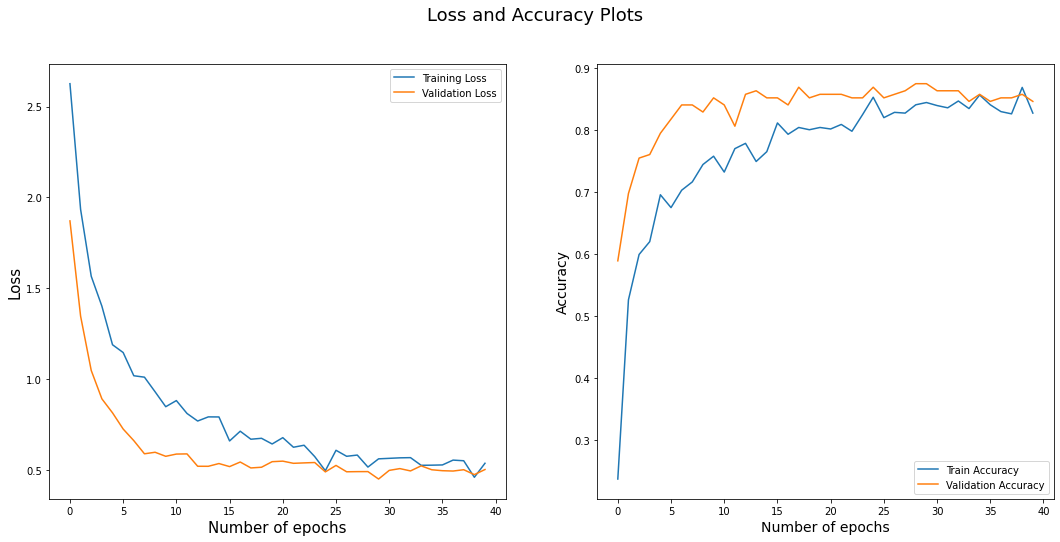

In [28]:
plt.figure(figsize=(18,8))

plt.suptitle('Loss and Accuracy Plots', fontsize=18)

plt.subplot(1,2,1)
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Number of epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)

plt.subplot(1,2,2)
plt.plot(model_history.history['accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Number of epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()

In [29]:
print(y_pred)

[13  6 14  3  9 11  4  3  7  8  6  3 17  9 14  1  5 17  9 19 18  4 13  5
 12  5  9 10  2 18 16  1  8  4  7 17  7 10 16  3  9  8  8  6  9  5 13  5
 17 16  8 13 13  8 18  4  7  7 16 18  5  3  2 15  6 19 10 17 10 10 15  7
 14 19 16 14  0 18 18 16 18  6 15  6 17 12 11 13  7  5 12  5 13 17  2 18
  9 15 19 17  8 14  3  4 15 10 15 13 10  7  8 19 15  7 13  2  2  2  7  8
  9 11 14 12 14  0 17 19  6  7 15 13 17 17  6 19  4 12 13 16  0  5 14  0
  5  7 19 11  7 15 11  1 14  6  7  2  3 16  4  2 18  5  2  4 12 18  5 11
  6 10 18  1  8 18  0]


In [30]:
from sklearn import metrics

print(metrics.confusion_matrix(np.argmax(y_test, axis=1), y_pred))

print(metrics.classification_report(np.argmax(y_test, axis=1), y_pred, digits=3))

[[ 5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0  0  0  1]
 [ 0  0  7  0  1  0  0  0  1  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  6  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  5  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  7  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  7  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  6  0  1  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0]
 [ 0  0  1  0  0  0  1  2  0  0  0  0  0  0  0  7  0  0

Ref:

https://towardsdatascience.com/cifar-100-transfer-learning-using-efficientnet-ed3ed7b89af2

https://www.youtube.com/watch?v=fCtMf6qHtdk


